<a href="https://colab.research.google.com/github/perryzjc/state-farm-distracted-driver-detector/blob/v1/ai_studio_farmers_insurance_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# State Farm Distracted Driver Detection

## Libraries

In [ ]:
# For downloading data set
!pip install kaggle

# Install system packages for image processing and machine learning
!pip install Pillow
!pip install opencv-python

# Install TensorFlow with optional CUDA support for GPU acceleration
!pip install tensorflow[and-cuda]

# Install tqdm for visual progress bars
!pip install tqdm

ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.5/549.5 MB 2.6 MB/s eta 0:00:00


In [1]:
# System built-in modules
from collections import defaultdict
import os

# Third-party modules
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tqdm import tqdm

# Local/application-specific imports
from google.colab import drive




In [4]:
# Import necessary libraries
import os
import pandas as pd
from google.colab import drive

# Data Set Download Helper

# Mount Google Drive (specific to Google Colab, not a standard import)
drive.mount('/content/drive', force_remount=True)


# Path to the shared folder on Google Drive
# Replace '/content/drive/My Drive/data_set/data/state-farm-distracted-driver-detection' with the actual path to your shared folder
shared_folder_path = '/content/drive/My Drive/data_set/jingchao/data/state-farm-distracted-driver-detection'
imgs_path = os.path.join(shared_folder_path, 'imgs')

# Path to the dataset within the shared folder
dataset_path = os.path.join(shared_folder_path, 'driver_imgs_list.csv')

# Path to the zip file within the shared folder
zip_file_path = os.path.join(shared_folder_path, 'state-farm-distracted-driver-detection.zip')

# Check if the dataset already exists in the shared folder
if not os.path.exists(dataset_path):
    # If the dataset doesn't exist, check if the zip file exists
    if os.path.exists(zip_file_path):
        # If the zip file exists, unzip it
        !unzip '{zip_file_path}' -d '{shared_folder_path}'
    else:
        # If the zip file doesn't exist, proceed to download it from Kaggle

        # Install the Kaggle API client
        !pip install kaggle

        # Upload the Kaggle API token (kaggle.json)
        # Note: This step is necessary for the first time or whenever the kaggle.json file changes
        from google.colab import files
        print("Please upload your kaggle.json file")
        files.upload()

        # Set up the Kaggle directory and credentials
        !mkdir -p ~/.kaggle
        !mv kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json

        # Download the dataset from Kaggle to the shared folder
        !kaggle competitions download -c state-farm-distracted-driver-detection -p '{shared_folder_path}'

        # Unzip the dataset
        !unzip '{shared_folder_path}/dataset.zip' -d '{shared_folder_path}'

# Now the dataset is available in the shared folder, either pre-existing or downloaded from Kaggle
# Load the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)

# Your code here...


Mounted at /content/drive


## 0. Load Data
The data contains information about the images and their respective classes

In [5]:
df.head(5)

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


## 1. Data Clean / Understanding

### 1.0 Clean Missing Values

In [ ]:
# Add your implementation

### 1.1 Distribution
Goal: Understand the distribution of columns in the data set.
1. Are all of the  columns normally distributed?

Impacts:
1. If the data is not normally distributed, the training process may be biased towards the majority class.

Precondition:
1. Data is loaded.
2. Missing values are handled.
   a. reason: missing values are not counted in the distribution.

Action: Find the distribution of every column in the data set, totally 3 columns.
1. subject
2. classname
3. img

#### 1.1.1 subject distribution

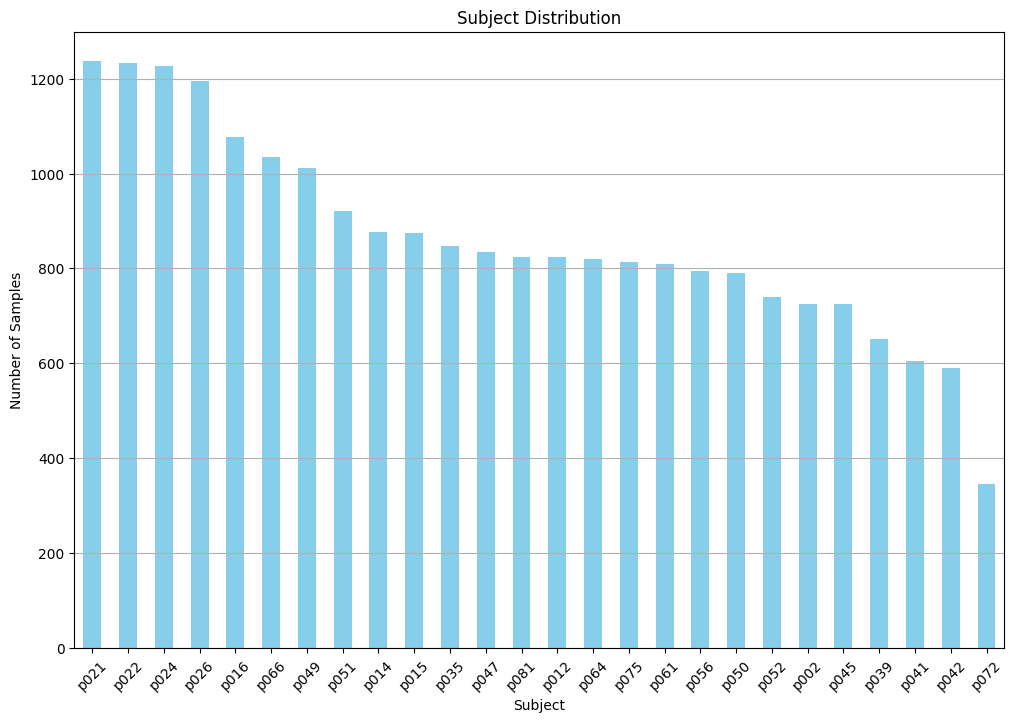

In [6]:
# Count the number of occurrences of each class
class_counts = df['subject'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 8))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Subject Distribution')
plt.xlabel('Subject')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### 1.1.2 classname distribution

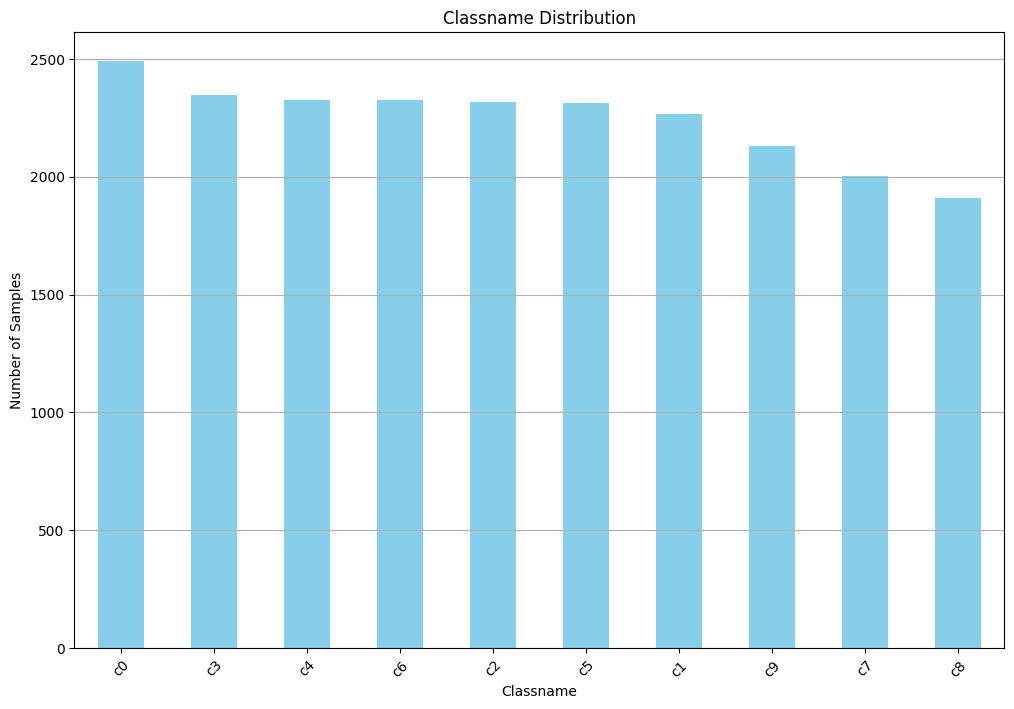

In [7]:
# Count the number of occurrences of each class
class_counts = df['classname'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 8))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Classname Distribution')
plt.xlabel('Classname')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### 1.1.3 img distribution
To visualize it may take quite a long time since img is likely to be unique.
So, instead of render every single bar, we can instead see if every of them are unique.

In [8]:
# Check the total number of 'img' entries
total_entries = len(df['img'])

# Check the number of unique 'img' entries
unique_entries = df['img'].nunique()

# Print the results
print(f"Total number of image entries: {total_entries}")
print(f"Number of unique image entries: {unique_entries}")

# Check if every image entry is unique
if total_entries == unique_entries:
    print("Every image entry is unique.")
else:
    print(f"There are {total_entries - unique_entries} duplicate image entries.")

Total number of image entries: 22424
Number of unique image entries: 22424
Every image entry is unique.


### Note: Before the below items (1.2, 1.3, 1.4), it will better to check what kind of inputs each model want. May be some model don't need to resize the image, simplify the color, etc.

### 1.2 Image Quality Check
**Here might be tricky**

Image Quality Check:
Check if all images are of
1. consistent quality,
2. resolution,
3. orientation.
4. Identify any corrupted or unreadable images.

**Note**: Based on the suggestion from James, since those image are already labeled, they are very likely to be okay, such the as the resolution, orientation, and the size.

Action:
Just in case,

1. write the code to check integrity for easy items, such as
  a. if every single img has the same size
  b. resolution same for each img? (how many pixels are displayed per inch of an image)
2. Manually random choose a portion of images (may be quickly galance 1000 images?), to build confidence:
  a. same orientation?
  b. any corrupted data?

### 1.2.1 Coding Part for Simple Items
Assignee: Jingchao Zhong

Note for the implementation:
By observation, the `img` column of `driver_imgs_list.csv` only contain the image filenames for the training data set, which means the image files are located in the `imgs/train` folder. Thus, to check the quality of all available imgs, I scan directly for the images under `imgs` folder.

In [ ]:
class ImageScanner:
    def __init__(self, path):
        self.path = path
        self.image_files = self._get_all_jpg_files()
        self.statistics = {
            "total_images": len(self.image_files),
            "same_size": 0,
            "different_size": 0,
            "same_resolution": 0,
            "different_resolution": 0,
            "reference_size": None,
            "reference_resolution": None,
            "size_issues": defaultdict(list),
            "resolution_issues": defaultdict(list)
        }

    def _get_all_jpg_files(self):
        """
        Retrieve all jpg files in the specified directory, including subdirectories.
        """
        jpg_files = []
        for root, _, files in os.walk(self.path):
            for file in files:
                if file.lower().endswith(".jpg"):
                    jpg_files.append(os.path.join(root, file))
        return jpg_files

    @staticmethod
    def _get_image_size_and_resolution(image_path):
        """
        Get the size and resolution of an image.
        """
        with Image.open(image_path) as img:
            size = img.size
            resolution = img.info.get('dpi', (None, None))
        return size, resolution

    def scan_images(self):
        if not self.image_files:
            print("No JPG images found in the provided path.")
            return

        reference_size, reference_resolution = self._get_image_size_and_resolution(self.image_files[0])
        self.statistics["reference_size"] = reference_size
        self.statistics["reference_resolution"] = reference_resolution

        for image_path in tqdm(self.image_files, desc="Scanning images", ncols=100):
            current_size, current_resolution = self._get_image_size_and_resolution(image_path)

            if current_size == reference_size:
                self.statistics["same_size"] += 1
            else:
                self.statistics["different_size"] += 1
                self.statistics["size_issues"][current_size].append(image_path)

            if current_resolution == reference_resolution:
                self.statistics["same_resolution"] += 1
            else:
                self.statistics["different_resolution"] += 1
                self.statistics["resolution_issues"][current_resolution].append(image_path)

    def display_statistics(self):
        """
        Display the statistics after scanning the images.
        """
        print(f"Total images scanned: {self.statistics['total_images']}")

        # Size statistics
        print(f"\nSize Statistics:")
        print(f"Images with same size as reference: {self.statistics['same_size']}")
        print(f"Images with different size: {self.statistics['different_size']}")
        print(f"Reference image size: {self.statistics['reference_size']}")

        if self.statistics["size_issues"]:
            print("\nDetails of images with different sizes:")
            for size, paths in self.statistics["size_issues"].items():
                print(f"Size: {size}")
                for p in paths:
                    print(f"   - {p}")

        # Resolution statistics
        print(f"\nResolution Statistics:")
        print(f"Images with same resolution as reference: {self.statistics['same_resolution']}")
        print(f"Images with different resolution: {self.statistics['different_resolution']}")
        print(f"Reference image resolution: {self.statistics['reference_resolution']}")

        if self.statistics["resolution_issues"]:
            print("\nDetails of images with different resolutions:")
            for resolution, paths in self.statistics["resolution_issues"].items():
                print(f"Resolution: {resolution}")
                for p in paths:
                    print(f"   - {p}")


print("start processing...")
scanner = ImageScanner(imgs_path)
scanner.scan_images()
scanner.display_statistics()

start processing...


NameError: ignored

### 1.2.2 Manual Part for Complicated Items
Assignee: Jingchao Zhong

Put your observations here:

By manual observation, I so far observed that there are examples of images that have different enviroment light:

Blue Enviroment Light:
* `img_51066.jpg` (`C0` of `train` folder)


Note:

I stop here for now, since here takes a lot time. I might revisit this item later, if our model don't give good result.

### 1.3 Image Resizing?
1. Does every image has the same size? Do we need to uniform the size?
2. Is there a model require a specific size of image? (Don't know yet, we will find out later during model selection)

Action: For the specific target image size, we don't yet. Revist this item when needed.

Assigne: No Needed

### 1.4 Data Augmentation?
GPT4:  Given the nature of the challenge (distracted driving), augmenting the dataset with rotations, shifts, flips, etc., can be beneficial to make the model robust. Are there some preprocess needed to make the training more efficient?

Note: Based on suggestions from James, there are already many advanced CV libraries handled those.

Action: Skip here for now. If any of the model we gonna use requires a specific input format, then revise here. Though, it's not likely be the case.

Assignee: No needed

## 1.5 Splitting the Data
Note: Images are already spliited into train and test folder, but we are only given one input csv. So here is where we need to split the csv into two parts. We need two data frames.

Assignee: Jingchao Zhong

Jingchao's Observation:

Firstly, a clarification:

Although we are provided with only one input CSV, this CSV contains only the image filenames from the `train` folder. It does not include any image filenames from the `test` folder. The images from the test folder are used to validate our model and to generate the output CSV, similar to sample_submission.csv. This is what Kaggle uses to evaluate the accuracy of our model.

Therefore, when we discuss splitting the data here, we aren't referring to correlating filenames across different folders. Instead, we are doing what we practiced earlier in the course: splitting the image filenames in the `train` folder into training and testing datasets. This allows us to assess our model's accuracy locally.

<img src="attachment:36d8c23c-58b8-4c31-8185-cd212e4d3be4.png" width="300" height="200">

In [ ]:
# Implementation
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print(f"Training dataset shape: {train_df.shape}")
print(f"Testing dataset shape: {test_df.shape}")

print("\nCheck if the data is still balanced after splitting\n")
print(train_df['classname'].value_counts(normalize=True))
print(test_df['classname'].value_counts(normalize=True))

## 2. Model Selection / Experiments
We are quite new to this area, so let's do some experiments. James have provided some links he found seems to be helpful.

Resources:
> 1. Tenserflow has a lot of interesting examples here.
https://www.tensorflow.org/lite/examples
One that might be useful for you guys is this gesture recognition one
https://github.com/tensorflow/examples/tree/master/lite/examples/gesture_classification/android

> 2. Also check out the section here on using Google’s TeachableMachines
https://github.com/jfd235/Interactive-Lab-Hub/tree/Fall2022/Lab%205

> 3. These articles seem to point to repositories that already have code in Colab/Jupyter notebook form
https://towardsdatascience.com/tutorial-using-deep-learning-and-cnns-to-make-a-hand-gesture-recognition-model-371770b63a51
https://developers.google.com/mediapipe/solutions/customization/gesture_recognizer

Final Note from James:
> There are a ton of resources out there like this, so I’d pick one that looks easy (the TeachableMachines looks really easy to prototype with IMO), try it with a few of your images for training (no point in using all of them since we’re just testing things for now), and see if they can predict a few of your other images for testing

### 2.1 Experiements Report for those sources
Don't have to be only one assignee.
Assignee:

Jingchao's Trail for CNN|

In [9]:

# Split the data into training and validation sets
# It's important to have a validation set to evaluate the model's performance on unseen data
# We use stratify to ensure that the distribution of classes remains the same in both the training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['classname'], random_state=42)


In [10]:
# Function to process the image paths
# This function reads the image from the file, decodes it into a matrix, resizes it, and normalizes the pixel values
def process_path(file_path, label):
    # Load the image
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])
    img = img / 255.0  # normalize pixel values
    return img, label

# Preparing the file paths and labels for the training and validation sets
base_dir = os.path.join(imgs_path, 'train')
train_paths = [os.path.join(base_dir, row.classname, row.img) for _, row in train_df.iterrows()]
val_paths = [os.path.join(base_dir, row.classname, row.img) for _, row in val_df.iterrows()]

# Converting class labels to one-hot encoding
# One-hot encoding is used to convert categorical data variables so they can be provided to machine learning algorithms to do a better job in prediction.
train_labels = tf.keras.utils.to_categorical(train_df['classname'].str.extract('(\d)').astype(int), num_classes=10)
val_labels = tf.keras.utils.to_categorical(val_df['classname'].str.extract('(\d)').astype(int), num_classes=10)

# Creating TensorFlow datasets for better performance and ease of use
train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))

# Mapping the process_path function to each item in the dataset
# This applies the image reading and preprocessing to all images in the dataset
train_ds = train_ds.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)


In [11]:
# Function to check whether all file paths are valid
def check_file_paths(file_paths):
    missing_files = [fp for fp in file_paths if not os.path.exists(fp)]
    if missing_files:
        print(f"Missing {len(missing_files)} files:")
        for fp in missing_files:
            print(fp)
    else:
        print("All files are present.")

# Check the file paths for both training and validation sets
check_file_paths(train_paths)
check_file_paths(val_paths)

All files are present.
All files are present.


In [ ]:
# Building the model
# We use a simple Convolutional Neural Network (CNN) architecture which is effective for image classification tasks
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compiling the model
# We use categorical_crossentropy as the loss function since it's a multi-class classification problem
# Adam is a good default optimizer to use, and we're interested in tracking accuracy as our evaluation metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
# We train for 10 epochs as a starting point, which represents 10 passes through the training data
# The model's performance is validated at the end of each epoch on the validation set
history = model.fit(
    train_ds.batch(32),
    epochs=10,
    validation_data=val_ds.batch(32)
)


Epoch 1/10
 92/561 [===>..........................] - ETA: 41:58 - loss: 2.7243 - accuracy: 0.3115

In [ ]:
 model.save('driver_behavior_model.h5')
